<a href="https://colab.research.google.com/github/mvbaracho/DataMinning/blob/main/PreProcessamento/PreProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Atividade 4** 

**Grupo**: Tâmara Dallegrave, Marcus Silva, Daniel Neto, Paulo Brasil.



In [ ]:
#BIBLIOTECAS

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import pandas as pd
import seaborn as sns
import statistics
import datetime as dt
import calendar

%matplotlib inline


In [ ]:
# IMPORTAÇÃO DB

!pip install PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':"138bRT5WPXfCdZj2fS_sMars4NlaQr75y"})
downloaded.GetContentFile('Sales2.csv')

In [ ]:
# CARREGANDO DB
df = pd.read_csv('Sales2.csv', sep=';', na_values='?')

df.head()


,Retailer,Pdv,Price,PaymentMethod,Timestamp,City,State
0,536329,137,0.15,1,2018-05-16 17:30:23.000,Pereira Barreto,SP
1,536329,136,1.38,1,2018-05-17 10:21:36.000,Pereira Barreto,SP
2,536329,135,1.00,1,2018-05-17 10:23:59.000,Pereira Barreto,SP
3,536329,135,10.00,1,2018-05-17 10:29:24.000,Pereira Barreto,SP
4,536329,136,0.79,1,2018-05-17 10:32:20.000,Pereira Barreto,SP


In [ ]:
#Pré-processamento da base de dados
#sns.heatmap(df.isna())
df['Timestamp']= pd.to_datetime(df['Timestamp'],format='%Y-%m-%d')
df['year']= df['Timestamp'].dt.year
df['month']= df['Timestamp'].dt.month
df['day']= df['Timestamp'].dt.day
df['hour'] = df['Timestamp'].dt.hour
df['Weekday'] = df['Timestamp'].dt.day_name()
df['PaymentMethod'] = np.where(df['PaymentMethod'] > 1, 'Credit Card', 'Cash')
#df = df.drop(columns='Timestamp')
df.head()

,Retailer,Pdv,Price,PaymentMethod,Timestamp,City,State,year,month,day,hour,Weekday
0,536329,137,0.15,Cash,2018-05-16 17:30:23,Pereira Barreto,SP,2018,5,16,17,Wednesday
1,536329,136,1.38,Cash,2018-05-17 10:21:36,Pereira Barreto,SP,2018,5,17,10,Thursday
2,536329,135,1.00,Cash,2018-05-17 10:23:59,Pereira Barreto,SP,2018,5,17,10,Thursday
3,536329,135,10.00,Cash,2018-05-17 10:29:24,Pereira Barreto,SP,2018,5,17,10,Thursday
4,536329,136,0.79,Cash,2018-05-17 10:32:20,Pereira Barreto,SP,2018,5,17,10,Thursday


In [ ]:
#Descrição do data frame
df.describe()

,Retailer,Pdv,Price,year,month,day,hour
count,1.801735e+06,1.801735e+06,1.801735e+06,1.801735e+06,1.801735e+06,1.801735e+06,1.801735e+06
mean,5.380827e+05,8.013374e+02,1.432785e+00,2.019647e+03,6.447087e+00,1.538270e+01,1.399046e+01
std,3.626383e+03,9.857824e+02,1.161206e+00,8.671797e-01,3.515193e+00,8.768686e+00,3.659640e+00
min,5.363240e+05,1.330000e+02,1.000000e-01,2.018000e+03,1.000000e+00,1.000000e+00,6.000000e+00
25%,5.363270e+05,1.360000e+02,1.050000e+00,2.019000e+03,3.000000e+00,8.000000e+00,1.100000e+01
50%,5.363330e+05,1.390000e+02,1.350000e+00,2.020000e+03,6.000000e+00,1.500000e+01,1.400000e+01
75%,5.365730e+05,2.261000e+03,1.680000e+00,2.020000e+03,1.000000e+01,2.300000e+01,1.700000e+01
max,5.486800e+05,2.278000e+03,1.000000e+01,2.021000e+03,1.200000e+01,3.100000e+01,2.200000e+01


Text(0.5, 1.0, 'Data correlation matrix')

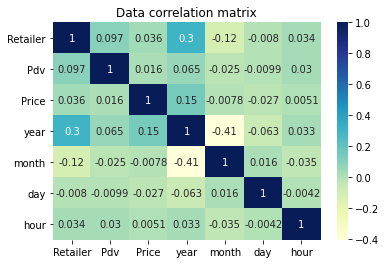

In [ ]:
#HeatMap da correlação entre os parametros da nossa base de dados
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.title('Data correlation matrix')

Pequenas informações importantes


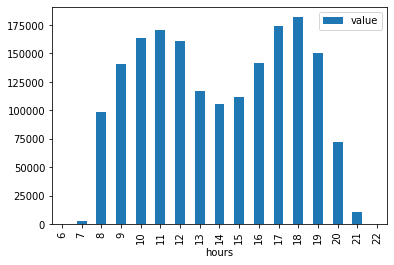

In [ ]:
#Gráficos de vendas por horas
qtySalesPerHour = df['hour'].value_counts().sort_values()
qtySalesPerHour = sorted(qtySalesPerHour.items(), key=lambda item: item[0])
pd.DataFrame(qtySalesPerHour, columns=['hours','value']).set_index('hours').plot(kind='bar');


In [ ]:
#função para calcular a quantidade de vendas em intervalos do dia
def countIntervals(firstValue, lastValue, param):
  intervals = len(df.loc[(df[param] >= firstValue) & (df[param] <= lastValue)])
  return intervals

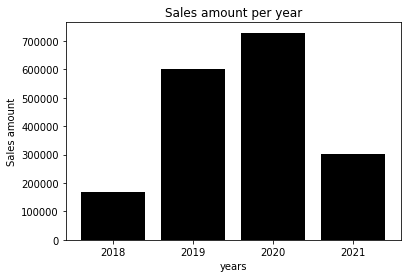

In [ ]:
#gráfico da quantidade de vendas por período do dia
first_year = countIntervals(2018, 2018, 'year')
second_year = countIntervals(2019, 2019, 'year')
third_year = countIntervals(2020, 2020, 'year')
fourth_year = countIntervals(2021, 2021, 'year')
qtd_sales_intervals_years = first_year,second_year,third_year,fourth_year
qtd_sales_intervals_years
periods = ['2018', '2019', '2020', '2021']
plt.bar(periods, qtd_sales_intervals_years, color='black')
plt.ylabel('Sales amount')
plt.xlabel('years')
plt.title('Sales amount per year')
plt.show()


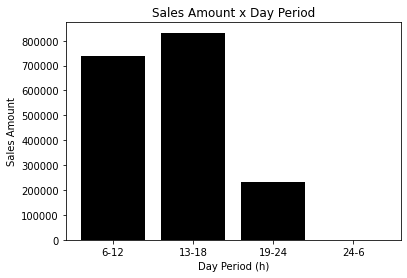

In [ ]:
#gráfico da quantidade de vendas por período do dia
morning = countIntervals(6, 12, 'hour')
afternoon = countIntervals(13, 18, 'hour')
evening = countIntervals(19, 24, 'hour')
night = countIntervals(24, 6, 'hour')
qtd_sales_intervals_days = morning,afternoon,evening,night
qtd_sales_intervals_days

#calcula frequência relativa
total = sum(qtd_sales_intervals_days)
frequencias_relativas =[]
for item in qtd_sales_intervals_days:
  frequencias_relativas.append((item/total)*100)
frequencias_relativas

periods = ['6-12', '13-18', '19-24', '24-6']
plt.bar(periods, qtd_sales_intervals_days, color='black')
plt.ylabel('Sales Amount')
plt.xlabel('Day Period (h)')
plt.title('Sales Amount x Day Period')
plt.show()


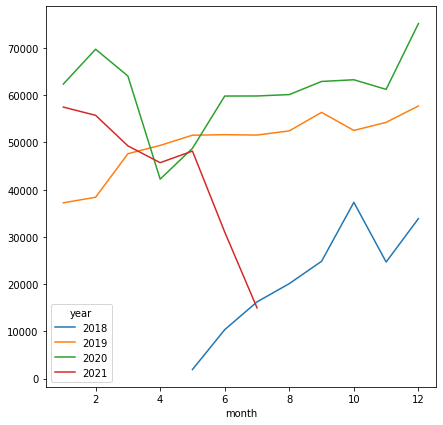

In [ ]:
#Gráfico de quantidade de vendas por meses em cada ano
sales_of_months_per_years = df.groupby(['month'])['year'].value_counts()
sales_of_months_per_years = sales_of_months_per_years.unstack()
sales_of_months_per_years.plot(kind='line',  figsize=(7, 7))

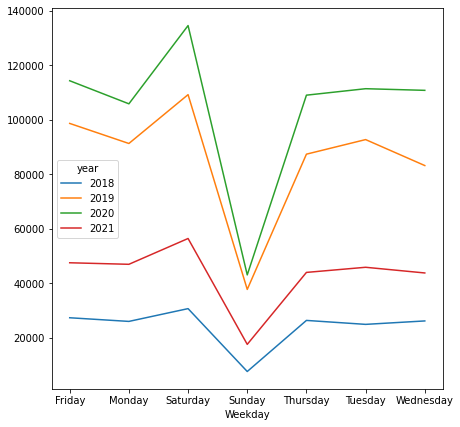

In [ ]:
#Gráfico de quantidade de vendas por dia da semana em cada ano
sales_of_weekDay_per_years = df.groupby(['Weekday'])['year'].value_counts()
sales_of_weekDay_per_years = sales_of_weekDay_per_years.unstack()
sales_of_weekDay_per_years.plot(kind='line',figsize=(7, 7))

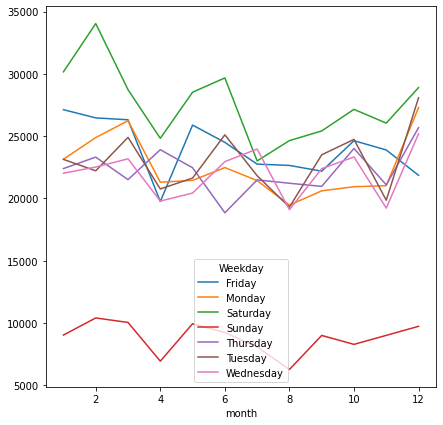

In [ ]:
#Gráfico de quantidade de vendas por dia da semana em cada ano
sales_of_weekDay_per_month = df.groupby(['month'])['Weekday'].value_counts()
sales_of_weekDay_per_month = sales_of_weekDay_per_month.unstack()
sales_of_weekDay_per_month.plot(kind='line', figsize=(7, 7))

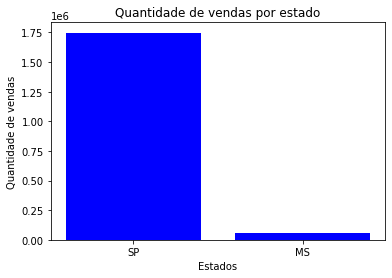

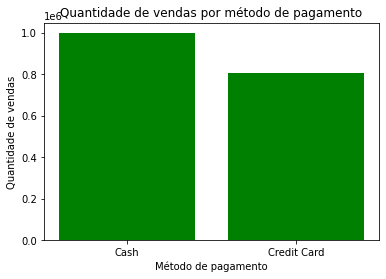

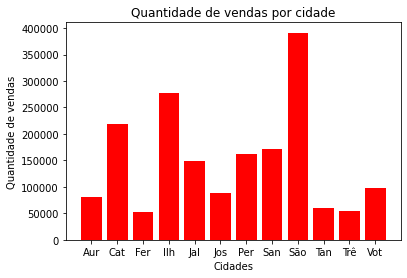

In [ ]:
# DISTRIBUIÇÃO DE FREQUÊNCIA
#esta função obtém o dataframe e retorna duas listas correspondentes à chave e valor do dataframe respectivamente
def retorne_listas(df):
    li_1 = []
    li_2 = []
    for elem, value in df.iteritems():
        li_1.append(elem)
        li_2.append(value)
    return li_1,li_2

#quantidade de vendas por estado
y = df['State'].value_counts()

plt.bar(retorne_listas(y)[0],retorne_listas(y)[1], color="blue")
plt.ylabel('Quantidade de vendas')
plt.xlabel('Estados')
plt.title('Quantidade de vendas por estado')
plt.show()

#quantidade de vendas por método de pagamento
y = df['PaymentMethod'].value_counts()

plt.bar(retorne_listas(y)[0],retorne_listas(y)[1], color="green")
plt.ylabel('Quantidade de vendas')
plt.xlabel('Método de pagamento')
plt.title('Quantidade de vendas por método de pagamento')
plt.show()

#quantidade de vendas por cidade
x = df.groupby(['City']).count()

#for para aparecer apenas as 3 primeiras letras de cada cidade
lista = [elem[:3] for elem in x.index]

plt.bar(lista, x['Retailer'], color= "red")
plt.ylabel('Quantidade de vendas')
plt.xlabel('Cidades')
plt.title('Quantidade de vendas por cidade')
plt.show()


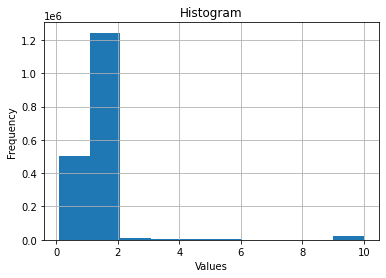

In [ ]:
# HISTOGRAMA
plt.gca().set(title='Histogram', xlabel='Values', ylabel='Frequency')
df['Price'].hist()

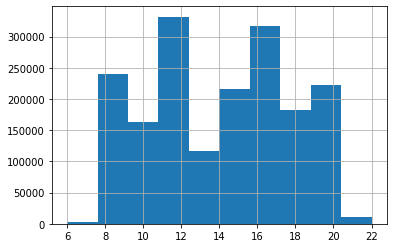

In [ ]:
#Histograma vendas - horas do dia
df['hour'].hist()

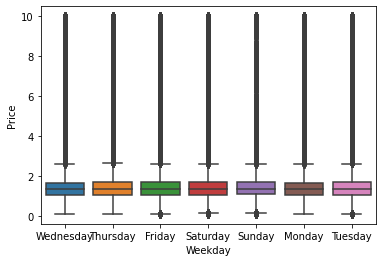

In [ ]:
# BOXPLOT
#boxplot de horas/preços, possui muitos outliers
sns.boxplot(x='Weekday',y='Price',data=df)

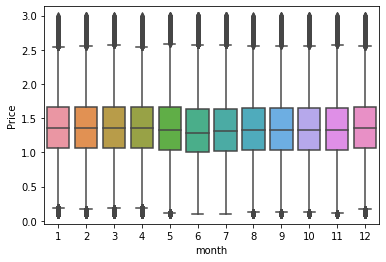

In [ ]:
#boxplot de meses/preços, possui muitos outliers
df_filtered = df[df['Price'] < 3]
sns.boxplot(x='month',y='Price',data=df_filtered)

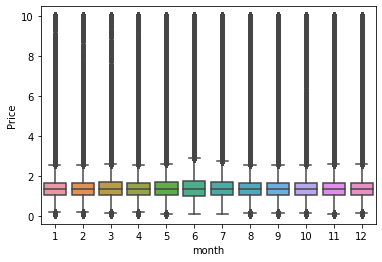

In [ ]:
#boxplot de meses/preços, possui muitos outliers
sns.boxplot(x='month',y='Price',data=df)

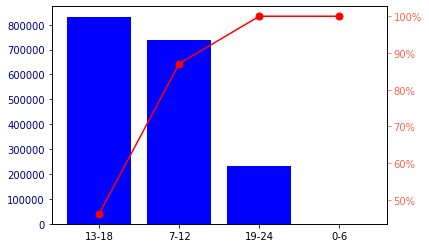

In [ ]:
#Gráfico de Pareto para a distruibuição de vendas por horas
first_interval_day = countIntervals(0,6,'hour')
second_interval_day = countIntervals(7,12,'hour')
third_interval_day = countIntervals(13,18,'hour')
fourth_interval_day = countIntervals(19,24,'hour')

qtd_sales_intervals_days = first_interval_day,second_interval_day,third_interval_day, fourth_interval_day
df2 = pd.DataFrame({'qty': qtd_sales_intervals_days})
df2.index = ['0-6', '7-12', '13-18', '19-24']
df2 = df2.sort_values(by='qty', ascending=False)
df2['percentage'] = df2['qty'].cumsum()/df2['qty'].sum()*100
fig, ax = plt.subplots()
ax.bar(df2.index, df2['qty'], color='blue')

ax2 = ax.twinx()

ax2.plot(df2.index, df2['percentage'], color='red', marker='o', ms=7)

ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis='y', colors='navy')
ax2.tick_params(axis='y', colors='tomato')

plt.show()

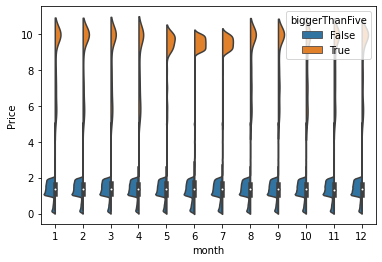

In [ ]:
#Gráfico de violino para identificação onde estão a maioria das vendas e dos outliers
df['biggerThanFive'] = np.where(df['Price'] > 5, True, False)
w = df['hour'].value_counts()
sns.violinplot(x='month',y='Price',data=df, hue='biggerThanFive', split=True)


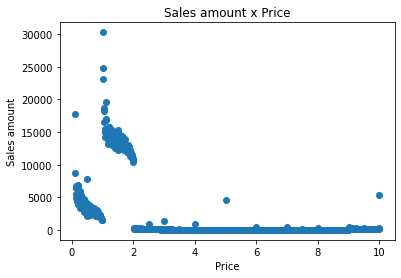

In [ ]:
#Gráfico de disperção da relação entre quantidade de vendas e preço
df3 = df['Price'].value_counts()
listas = retorne_listas(df3)
plt.scatter(listas[0],listas[1])
plt.title('Sales amount x Price')
plt.xlabel('Price')
plt.ylabel('Sales amount')
plt.show()


#DICIONÁRIO DE DADOS



```
df['Timestamp'].min()
df['Timestamp'].max()
df['City'].value_counts()
df['City'].unique()
df['State'].unique()
```


# **ATIVIDADE 6 - CLASSIFICAÇÃO**



In [ ]:
#CÁLCULO DE DIAS DA SEMANA (na base de dados)
'''
start = df['Timestamp'].min().strftime('%Y-%m-%d')
end = df['Timestamp'].max().strftime('%Y-%m-%d')

weekday = ['Sat', 'Fri', 'Tue', 'Mon', 'Thu', 'Wed', 'Sun']

qnt_weekday = []
for elem in weekday:
  qtd = np.busday_count(start, end, weekmask=elem)
  qnt_weekday.append((elem,qtd))

qnt_weekday
'''



[('Sat', 165),
 ('Fri', 165),
 ('Tue', 165),
 ('Mon', 165),
 ('Thu', 165),
 ('Wed', 166),
 ('Sun', 165)]

In [ ]:
#CÁLCULO DE VENDAS (por dia da semana)

weekday_rec = df['Weekday'].value_counts()
weekday_mean = []
weekday_values = []
for elem in weekday_rec:
  weekday_values.append(elem)

i = 0
for elem, value in qnt_weekday:
    weekday_mean.append((elem,round(weekday_values[i]/value)))
    i += 1
weekday_mean


[('Sat', 2007),
 ('Fri', 1746),
 ('Tue', 1667),
 ('Mon', 1638),
 ('Thu', 1618),
 ('Wed', 1591),
 ('Sun', 643)]

In [ ]:
#QUANTIDADE DE VENDAS (por dia)

df_class = df.resample('D', on='Timestamp')['Price'].sum().reset_index(name='Amount')
df_class2 = df[['Timestamp', 'Price']].groupby(pd.Grouper(key='Timestamp', freq='1D')).count()['Price']

#df.resample('D', on='Timestamp')['Price'].sum().value_counts().rename_axis('date').reset_index(name='count'))
df_class2

Timestamp
2018-05-16       1
2018-05-17     119
2018-05-18     296
2018-05-19     228
2018-05-20      93
              ... 
2021-07-11     396
2021-07-12    1115
2021-07-13    1095
2021-07-14    1019
2021-07-15      96
Freq: D, Name: Price, Length: 1157, dtype: int64

In [ ]:
#CRIAÇÃO DATAFRAME (com quantidade de vendas e valor total vendido por dia)

#df_class_result = pd.merge(df_class,df_class2,on='date')
result = df_class.merge(df_class2, how='inner', on='Timestamp')
result = result.rename(columns={'Price': 'Qty'})

result['Timestamp'] = pd.to_datetime(result['Timestamp'],format='%Y-%m-%d')
result['Weekday'] = result['Timestamp'].dt.day_name()
result['Avg'] = result['Amount']/result['Qty']
result.head()

,Timestamp,Amount,Qty,Weekday,Avg
0,2018-05-16,0.15,1,Wednesday,0.150000
1,2018-05-17,156.34,119,Thursday,1.313782
2,2018-05-18,370.60,296,Friday,1.252027
3,2018-05-19,239.73,228,Saturday,1.051447
4,2018-05-20,118.32,93,Sunday,1.272258


In [ ]:
#VERIFICAÇÃO DE DADOS NULOS

result = result.fillna(0)
result
result.loc[result['Avg'] == 0] #Feriados nacionais

,Timestamp,Amount,Qty,Weekday,Avg
223,2018-12-25,0.0,0,Tuesday,0.0
230,2019-01-01,0.0,0,Tuesday,0.0
588,2019-12-25,0.0,0,Wednesday,0.0
595,2020-01-01,0.0,0,Wednesday,0.0
954,2020-12-25,0.0,0,Friday,0.0
961,2021-01-01,0.0,0,Friday,0.0


In [ ]:
#CRIAÇÃO DA COLUNA DE SAÍDA (DO CLASSIFICADOR)

values = ['Good', 'Regular', 'Bad']

conditions = [
    (result['Amount'] > result['Avg']),
    (result['Amount'] == result['Avg']),
    (result['Amount'] < result['Avg'])
    ]

result['Analysis'] = np.select(conditions, values)
result.head()

,Timestamp,Amount,Qty,Weekday,Avg,Analysis
0,2018-05-16,0.15,1,Wednesday,0.150000,Regular
1,2018-05-17,156.34,119,Thursday,1.313782,Good
2,2018-05-18,370.60,296,Friday,1.252027,Good
3,2018-05-19,239.73,228,Saturday,1.051447,Good
4,2018-05-20,118.32,93,Sunday,1.272258,Good
